# Expample problem to fit reaction data to Arrhenius
- Say, we have experimentally determined rate coefficients vs corresponding temperature values, we can check if the data obeys Arrhenius law. This notebook uses example data from ethane cracking. The code in the first cell creates `ethane_data` a pandas dataframe from the data. A CSV can be supplied by the user to analyze larger datasets

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
T_celcius = np.array([702, 725, 734, 754, 773, 
                      789, 803, 810, 827, 837]) # Data from problem
T_kelvin = 273 + temperature_celcius
k_coeff = np.array([0.15, 0.273, 0.333, 0.595, 0.923, 
                    1.492, 2.138, 2.718, 4.137, 4.665]) # Data frm problem
ethane_data = pd.DataFrame({'T(\u00B0C)': T_celcius, 'k(s\u207B\u00B9)': 
                     k_coeff, "T(K)": T_kelvin, "1/T (K\u207B\u00B9)": 1/T_kelvin,
                     'In k': np.log(k_coeff)}) # Used Pandas frame to present in table

In [91]:
ethane_data

,T(°C),k(s⁻¹),T(K),1/T (K⁻¹),In k
0,702,0.150,975,0.001026,-1.897120
1,725,0.273,998,0.001002,-1.298283
2,734,0.333,1007,0.000993,-1.099613
3,754,0.595,1027,0.000974,-0.519194
4,773,0.923,1046,0.000956,-0.080126
5,789,1.492,1062,0.000942,0.400118
6,803,2.138,1076,0.000929,0.759871
7,810,2.718,1083,0.000923,0.999896
8,827,4.137,1100,0.000909,1.419971
9,837,4.665,1110,0.000901,1.540088


In [ ]:
# Alternative codeblock to allow user parse a csv
user_csv = pd.read_csv('user_csv_data_')
# Load the combined CSV file
# User can carry out neccessary preprocessing depending on the data

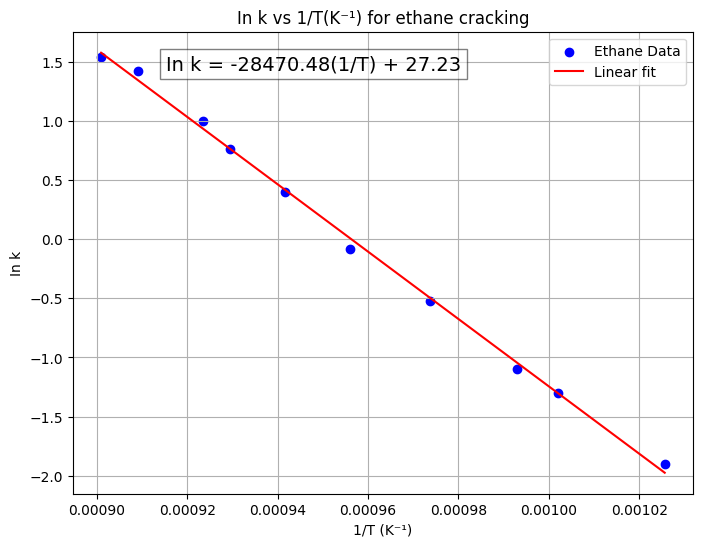

In [107]:
# Here we plot the data based on Arrhenius
x = 1/T_kelvin
y = np.log(k_coeff)

# Compute the linear fit with a degree 1 polynomial
coeff = np.polyfit(x, y, 1)    # coeff[0]: slope which is -Ea/R, 
                               #coeff[1]: intercept which is In A
fit_fn = np.poly1d(coeff)     # Create a polynomial object for easy evaluation
# Generate y values from the fit for plotting the fitted line
y_fit = fit_fn(x)
# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Ethane Data')
plt.plot(x, y_fit, color='red', label='Linear fit')
# Prepare the equation text (formatted to 2 decimal places)
equation = f"In k = {coeff[0]:.2f}(1/T) + {coeff[1]:.2f}"
plt.text(0.15, 0.95, equation, transform=plt.gca().transAxes,
         fontsize=14, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
# Set labels, title, legend, and grid
plt.xlabel("1/T (K\u207B\u00B9)")
plt.ylabel("In k")
plt.title("In k vs 1/T(K\u207B\u00B9) for ethane cracking")
plt.legend()
plt.grid(True)
# Save the plot as an image file (PNG format)
plt.savefig("ethane_Arrhenius_fit_plot.png", dpi=300)
# Display the plot
plt.show()

In [109]:
# Compute R² value
SS_res = np.sum((y - y_fit)**2)  # Residual sum of squares
SS_tot = np.sum((y - np.mean(y))**2) # Total sum of squares
R2 = 1 - (SS_res / SS_tot)
print(f"R² = {R2:.3f}")

R² = 0.998
